<a href="https://colab.research.google.com/github/Keonbowman1/data_science/blob/main/San_Antonio_TX_Real_Estate_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

**Find Data for Machine Learning Model**

In [ ]:
# https://www.mytexashomeresource.com/idx/results/

# This is the website that I used to scrape my data from. I downloaded all the listings for Single Family homes and condos within San Antonio, TX

In [ ]:
# I need to upload my Condo listings.

condo = pd.read_csv('/content/condo.csv', encoding="utf-8")
condo.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14_HREF,Col15_SRC
0,"$165,000",23.0,3843 Barrington St,"San Antonio, TX 78217",Woodmont Townhomes,2,Beds,2,Baths,"1,009",Sq.Ft.,MLS #: 1698407,NaN,NaN,https://www.mytexashomeresource.com/idx/3843-b...,https://cdn.listingphotos.sierrastatic.com/pic...
1,"$138,900",17.0,9915 Powhatan Dr,"San Antonio, TX 78230",Chartwell Condo,1,Beds,1F11/2,Baths,796,Sq.Ft.,MLS #: 1698428,F,2-Jan,https://www.mytexashomeresource.com/idx/9915-p...,https://cdn.listingphotos.sierrastatic.com/pic...
2,"$180,000",20.0,8415 Fredericksburg Rd,"San Antonio, TX 78229",Kensington Row,2,Beds,2,Baths,"1,203",Sq.Ft.,MLS #: 1698464,NaN,NaN,https://www.mytexashomeresource.com/idx/8415-f...,https://cdn.listingphotos.sierrastatic.com/pic...
3,"$399,999",32.0,215 Center St,"San Antonio, TX 78202",Vidorra,1,Beds,1F11/2,Baths,"1,234",Sq.Ft.,MLS #: 1698054,F,2-Jan,https://www.mytexashomeresource.com/idx/215-ce...,https://cdn.listingphotos.sierrastatic.com/pic...
4,"$287,000",20.0,201 Ellwood St,"San Antonio, TX 78209",Brighton Squ,2,Beds,2,Baths,"1,198",Sq.Ft.,MLS #: 1692195,NaN,NaN,https://www.mytexashomeresource.com/idx/201-el...,https://cdn.listingphotos.sierrastatic.com/pic...


In [ ]:
# Now I will upload my Single Family home listings

singlefamily = pd.read_csv('/content/Singlefamily.csv', encoding="utf-8")
singlefamily.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14_HREF,Col15_SRC
0,"$389,000",42.0,3607 Ponderosa Bend,"San Antonio, TX 78261",Bulverde Village,5,Beds,3F11/2,Baths,"3,006",Sq.Ft.,MLS #: 1663990,F,2-Jan,https://www.mytexashomeresource.com/idx/3607-p...,https://cdn.listingphotos.sierrastatic.com/pic...
1,"$359,900",32.0,8926 Ironwood Hill,"San Antonio, TX 78254",Valley Ranch - Bexar County,5,Beds,3F11/2,Baths,"2,680",Sq.Ft.,MLS #: 1698505,F,2-Jan,https://www.mytexashomeresource.com/idx/8926-i...,https://cdn.listingphotos.sierrastatic.com/pic...
2,"$259,000",26.0,1306 E Nolan St,"San Antonio, TX 78202",Dignowity,3,Beds,1,Baths,"1,530",Sq.Ft.,MLS #: 1698515,NaN,NaN,https://www.mytexashomeresource.com/idx/1306-e...,https://cdn.listingphotos.sierrastatic.com/pic...
3,"$745,000",29.0,3910 Creek Spring,"San Antonio, TX 78230",Hunters Creek North,4,Beds,3,Baths,"2,937",Sq.Ft.,MLS #: 1698401,NaN,NaN,https://www.mytexashomeresource.com/idx/3910-c...,https://cdn.listingphotos.sierrastatic.com/pic...
4,"$305,000",32.0,965 Spur Ridge,"San Antonio, TX 78264",Cowboy Crossing,3,Beds,2,Baths,"1,792",Sq.Ft.,MLS #: 1698404,NaN,NaN,https://www.mytexashomeresource.com/idx/965-sp...,https://cdn.listingphotos.sierrastatic.com/pic...


**Pre-Processing the Data**

In [ ]:
# I will need to combine both of these dfs into 1.
# However I must add a property type column to each of the dfs before I combine them

condo['property_type'] = 'Condo/Townhome'
condo.head(2)

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14_HREF,Col15_SRC,property_type
0,"$165,000",23.0,3843 Barrington St,"San Antonio, TX 78217",Woodmont Townhomes,2,Beds,2,Baths,"1,009",Sq.Ft.,MLS #: 1698407,NaN,NaN,https://www.mytexashomeresource.com/idx/3843-b...,https://cdn.listingphotos.sierrastatic.com/pic...,Condo/Townhome
1,"$138,900",17.0,9915 Powhatan Dr,"San Antonio, TX 78230",Chartwell Condo,1,Beds,1F11/2,Baths,796,Sq.Ft.,MLS #: 1698428,F,2-Jan,https://www.mytexashomeresource.com/idx/9915-p...,https://cdn.listingphotos.sierrastatic.com/pic...,Condo/Townhome


In [ ]:
# Creating a property type column for my single family CSV

singlefamily['property_type'] = 'Single Family'
singlefamily.head(2)

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14_HREF,Col15_SRC,property_type
0,"$389,000",42.0,3607 Ponderosa Bend,"San Antonio, TX 78261",Bulverde Village,5,Beds,3F11/2,Baths,"3,006",Sq.Ft.,MLS #: 1663990,F,2-Jan,https://www.mytexashomeresource.com/idx/3607-p...,https://cdn.listingphotos.sierrastatic.com/pic...,Single Family
1,"$359,900",32.0,8926 Ironwood Hill,"San Antonio, TX 78254",Valley Ranch - Bexar County,5,Beds,3F11/2,Baths,"2,680",Sq.Ft.,MLS #: 1698505,F,2-Jan,https://www.mytexashomeresource.com/idx/8926-i...,https://cdn.listingphotos.sierrastatic.com/pic...,Single Family


In [ ]:
# My condo CSV has 493 rows

len(condo)

493

In [ ]:
# My single family csv has 4420 rows

len(singlefamily)

4420

In [ ]:
# Now that the property type column is created. I will now append both dfs
df = pd.concat([singlefamily, condo], ignore_index = True)

# The new lenght now represents both dataframes combined
len(df)

4913

In [ ]:
# Now I will start pre-processing the data by removing uneeded columns

df1 = df.drop(['Col1', 'Col6', 'Col6', 'Col8', 'Col10',
         'Col11', 'Col12', 'Col13', 'Col14_HREF',
         'Col15_SRC'], axis = 'columns')
df1.head()

,Col0,Col2,Col3,Col4,Col5,Col7,Col9,property_type
0,"$389,000",3607 Ponderosa Bend,"San Antonio, TX 78261",Bulverde Village,5,3F11/2,"3,006",Single Family
1,"$359,900",8926 Ironwood Hill,"San Antonio, TX 78254",Valley Ranch - Bexar County,5,3F11/2,"2,680",Single Family
2,"$259,000",1306 E Nolan St,"San Antonio, TX 78202",Dignowity,3,1,"1,530",Single Family
3,"$745,000",3910 Creek Spring,"San Antonio, TX 78230",Hunters Creek North,4,3,"2,937",Single Family
4,"$305,000",965 Spur Ridge,"San Antonio, TX 78264",Cowboy Crossing,3,2,"1,792",Single Family


In [ ]:
# Now I will rename the columns

df2 = df1.rename(columns = {'Col0' : 'home_value', 'Col2' : 'street_address',
                            'Col3' : 'location', 'Col4' : 'neighborhood',
                            'Col5' : 'bed', 'Col7' : 'bath', 'Col9' : 'sqft'})
df2.head()

,home_value,street_address,location,neighborhood,bed,bath,sqft,property_type
0,"$389,000",3607 Ponderosa Bend,"San Antonio, TX 78261",Bulverde Village,5,3F11/2,"3,006",Single Family
1,"$359,900",8926 Ironwood Hill,"San Antonio, TX 78254",Valley Ranch - Bexar County,5,3F11/2,"2,680",Single Family
2,"$259,000",1306 E Nolan St,"San Antonio, TX 78202",Dignowity,3,1,"1,530",Single Family
3,"$745,000",3910 Creek Spring,"San Antonio, TX 78230",Hunters Creek North,4,3,"2,937",Single Family
4,"$305,000",965 Spur Ridge,"San Antonio, TX 78264",Cowboy Crossing,3,2,"1,792",Single Family


In [ ]:
# Removing Bexar County from the neighbordhood entry in row with index number 1, since all of the neighborhoods are in Bexar
# I also have a mispelling for the Aspen Village neighborhood

df2.loc[df2.neighborhood == 'Valley Ranch - Bexar County', 'neighborhood'] = 'Valley Ranch'
df2.loc[df2.neighborhood == 'Aspen Villag', 'neighborhood'] = 'Aspen Village'
df2.head()

,home_value,street_address,location,neighborhood,bed,bath,sqft,property_type
0,"$389,000",3607 Ponderosa Bend,"San Antonio, TX 78261",Bulverde Village,5,3F11/2,"3,006",Single Family
1,"$359,900",8926 Ironwood Hill,"San Antonio, TX 78254",Valley Ranch,5,3F11/2,"2,680",Single Family
2,"$259,000",1306 E Nolan St,"San Antonio, TX 78202",Dignowity,3,1,"1,530",Single Family
3,"$745,000",3910 Creek Spring,"San Antonio, TX 78230",Hunters Creek North,4,3,"2,937",Single Family
4,"$305,000",965 Spur Ridge,"San Antonio, TX 78264",Cowboy Crossing,3,2,"1,792",Single Family


In [ ]:
# Reorder the columns

df2 = df2[['neighborhood', 'sqft', 'bath',
           'location', 'bed', 'property_type',
           'home_value']]

In [ ]:
# Checking to see all my unique values within the location column

df2.location.unique()

array(['San Antonio,  TX 78261', 'San Antonio,  TX 78254',
       'San Antonio,  TX 78202', 'San Antonio,  TX 78230',
       'San Antonio,  TX 78264', 'San Antonio,  TX 78263',
       'San Antonio,  TX 78239', 'San Antonio,  TX 78222',
       'San Antonio,  TX 78233', 'San Antonio,  TX 78250',
       'San Antonio,  TX 78258', 'San Antonio,  TX 78209',
       'San Antonio,  TX 78240', 'San Antonio,  TX 78238',
       'San Antonio,  TX 78203', 'San Antonio,  TX 78259',
       'San Antonio,  TX 78217', 'San Antonio,  TX 78207',
       'San Antonio,  TX 78227', 'San Antonio,  TX 78245',
       'San Antonio,  TX 78252', 'San Antonio,  TX 78247',
       'San Antonio,  TX 78228', 'San Antonio,  TX 78220',
       'San Antonio,  TX 78260', 'San Antonio,  TX 78201',
       'San Antonio,  TX 78253', 'San Antonio,  TX 78232',
       'San Antonio,  TX 78204', 'San Antonio,  TX 78244',
       'San Antonio,  TX 78218', 'San Antonio,  TX 78255',
       'San Antonio,  TX 78251', 'San Antonio,  TX 78211

In [ ]:
# Since all the location entries are San Antonio, TX, I'm going to remove the City and State from the location columns
# I will run a function to keep only the numeric values within location

df2['location'] = df2['location'].str.replace(r'\D+', '')
df2.head()

<ipython-input-15-7b7c492a24a8>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['location'] = df2['location'].str.replace(r'\D+', '')
<ipython-input-15-7b7c492a24a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].str.replace(r'\D+', '')


,neighborhood,sqft,bath,location,bed,property_type,home_value
0,Bulverde Village,"3,006",3F11/2,78261,5,Single Family,"$389,000"
1,Valley Ranch,"2,680",3F11/2,78254,5,Single Family,"$359,900"
2,Dignowity,"1,530",1,78202,3,Single Family,"$259,000"
3,Hunters Creek North,"2,937",3,78230,4,Single Family,"$745,000"
4,Cowboy Crossing,"1,792",2,78264,3,Single Family,"$305,000"


In [ ]:
# Renaming the column to "zip"

df3 = df2.rename(columns = {'location' : 'zip'})
df3.head()

,neighborhood,sqft,bath,zip,bed,property_type,home_value
0,Bulverde Village,"3,006",3F11/2,78261,5,Single Family,"$389,000"
1,Valley Ranch,"2,680",3F11/2,78254,5,Single Family,"$359,900"
2,Dignowity,"1,530",1,78202,3,Single Family,"$259,000"
3,Hunters Creek North,"2,937",3,78230,4,Single Family,"$745,000"
4,Cowboy Crossing,"1,792",2,78264,3,Single Family,"$305,000"


In [ ]:
# Now I will start cleaning up the bathroom columns. The data type is an object
# I will need to convert the values to a float before I can train test split

df3.bath.unique()

array(['3F11/2', '1', '3', '2', '2F11/2', '12F121/2', '4', '4F11/2',
       '4F31/2', '3F21/2', '5', '1F11/2', '5F11/2', '2F21/2', '2F51/2',
       '6', '4F21/2', '6F11/2', '1,920', '3F41/2', '2F31/2', '7F11/2',
       '7', '2F91/2', '5F21/2', '41/2', '21/2', '2-Nov'], dtype=object)

In [ ]:
# For all of my listings that have half bathrooms. I convert them into a Float to make them suitable for my machine learning model later.
# For example, if an entry says '2F 1 1/2', I will make the value 2.5
# 2.5 means 2 Full bathrooms and 1 half bathroom

df3.loc[df3.bath == '3F11/2', 'bath'] = 3.5
df3.loc[df3.bath == '2F11/2', 'bath'] = 2.5
df3.loc[df3.bath == '12F121/2', 'bath'] = 18
df3.loc[df3.bath == '4F11/2', 'bath'] = 4.5
df3.loc[df3.bath == '4F31/2', 'bath'] = 5.5
df3.loc[df3.bath == '3F21/2', 'bath'] = 4
df3.loc[df3.bath == '1F11/2', 'bath'] = 1.5
df3.loc[df3.bath == '5F11/2', 'bath'] = 5.5
df3.loc[df3.bath == '2F21/2', 'bath'] = 3
df3.loc[df3.bath == '2F51/2', 'bath'] = 4.5
df3.loc[df3.bath == '4F21/2', 'bath'] = 5
df3.loc[df3.bath == '6F11/2', 'bath'] = 6.5
df3.loc[df3.bath == '3F41/2', 'bath'] = 5
df3.loc[df3.bath == '2F31/2', 'bath'] = 3.5
df3.loc[df3.bath == '7F11/2', 'bath'] = 7.5
df3.loc[df3.bath == '2F91/2', 'bath'] = 6.5
df3.loc[df3.bath == '5F21/2', 'bath'] = 6

In [ ]:
# I still have a few values that dont make sense

df3.bath.value_counts()

2        1819
2.5      1379
3         566
3.5       516
1         308
1.5        90
4          84
4.5        75
5.5        19
5          14
4          13
3           7
5           6
6.5         5
6           3
6           2
18          1
1,920       1
7.5         1
7           1
41/2        1
21/2        1
2-Nov       1
Name: bath, dtype: int64

In [ ]:
# Now I will drop the bath entries that doesnt make sense such as 1,920, 41/2, 21/2, and 2-Nov

df4 = df3.drop(df3[(df3['bath'] == '1,920') |
(df3['bath'] == 18) |
(df3['bath'] == '41/2') |
(df3['bath'] == '21/2') |
(df3['bath'] == '2-Nov')].index)

In [ ]:
df4.bath.unique()

array([3.5, '1', '3', '2', 2.5, '4', 4.5, 5.5, 4, '5', 1.5, 3, '6', 5,
       6.5, 7.5, '7', 6], dtype=object)

In [ ]:
df4.head()

,neighborhood,sqft,bath,zip,bed,property_type,home_value
0,Bulverde Village,"3,006",3.5,78261,5,Single Family,"$389,000"
1,Valley Ranch,"2,680",3.5,78254,5,Single Family,"$359,900"
2,Dignowity,"1,530",1,78202,3,Single Family,"$259,000"
3,Hunters Creek North,"2,937",3,78230,4,Single Family,"$745,000"
4,Cowboy Crossing,"1,792",2,78264,3,Single Family,"$305,000"


In [ ]:
# Removing commas and dollar sign from home_value and sqft columns
# Convert columns to float

df4['home_value'] = df4['home_value'].str.replace('$', '')
df4['home_value'] = df4['home_value'].str.replace(',', '')
df4['sqft'] = df4['sqft'].str.replace(',', '')
df4[["home_value", "sqft"]] = df4[["home_value", "sqft"]].apply(pd.to_numeric)
df4.head()

<ipython-input-23-7b2d9b0f7acc>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['home_value'] = df4['home_value'].str.replace('$', '')


,neighborhood,sqft,bath,zip,bed,property_type,home_value
0,Bulverde Village,3006.0,3.5,78261,5,Single Family,389000
1,Valley Ranch,2680.0,3.5,78254,5,Single Family,359900
2,Dignowity,1530.0,1,78202,3,Single Family,259000
3,Hunters Creek North,2937.0,3,78230,4,Single Family,745000
4,Cowboy Crossing,1792.0,2,78264,3,Single Family,305000


In [ ]:
# Lets clean up the neighborhood column

df4['neighborhood'].value_counts()

Kallison Ranch                 80
Riverstone At Westpointe       79
Valley Ranch                   76
Redbird Ranch                  70
Denver Heights                 64
                               ..
Oxbow                           1
I35 So To E Houston             1
Brkhaven/Starlit/Grn Meadow     1
The Park At Hardy Oak           1
Oaks Of Westcreek               1
Name: neighborhood, Length: 1143, dtype: int64

In [ ]:
df4 = df4[df4.groupby('neighborhood').neighborhood.transform(len) > 1]

In [ ]:
df4.neighborhood.nunique()

604

In [ ]:
# Now I will check for null values

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 0 to 4912
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighborhood   4219 non-null   object 
 1   sqft           4217 non-null   float64
 2   bath           4219 non-null   object 
 3   zip            4219 non-null   object 
 4   bed            4219 non-null   object 
 5   property_type  4219 non-null   object 
 6   home_value     4219 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 263.7+ KB


In [ ]:
df5 = df4.dropna()

**Data Exploration and Analysis**

In [ ]:
# I want to get a visual representation of where the most expensive areas of San Antonio are.
# I will do this by taking the average home value of each zipcode.

avg = df5.groupby(['zip'])[['home_value']].mean().round()
avg.head()

,home_value
zip,
78009,560744.0
78023,892983.0
78073,259846.0
78108,359990.0
78109,294576.0


In [ ]:
# I will then have to reset the index so that I can plot both the zipcode and avg home value on a map

avg1 = avg.reset_index('zip')
avg1.head()

,zip,home_value
0,78009,560744.0
1,78023,892983.0
2,78073,259846.0
3,78108,359990.0
4,78109,294576.0


In [ ]:
# Renaming the features so that there easier to read when I plot them on the map

avg2 = avg1.rename(columns = {'zip' : 'Zipcode', 'home_value' : 'Home Value'})
avg2.head()

,Zipcode,Home Value
0,78009,560744.0
1,78023,892983.0
2,78073,259846.0
3,78108,359990.0
4,78109,294576.0


In [ ]:
# The plotly express library will allow me to plot the longitude and latitude coordinates of each zipcode on a map,
# but first I need to determine long and lat and add them in as a column
# The pgeocode library will be used to do this

# This command installs the pgeocode library
!pip install pgeocode
import pgeocode
from geopy.geocoders import Nominatim


In [ ]:
# This command will query all the zipcodes within my dataframe and add the matching long and lat coordinates within their own columns
nomi = pgeocode.Nominatim('us')

avg2['Latitude'] = (nomi.query_postal_code(avg2['Zipcode'].tolist()).latitude)
avg2['Longitude'] = (nomi.query_postal_code(avg2['Zipcode'].tolist()).longitude)

avg2.head()

,Zipcode,Home Value,Latitude,Longitude
0,78009,560744.0,29.3553,-98.8824
1,78023,892983.0,29.6321,-98.7542
2,78073,259846.0,29.2750,-98.6677
3,78108,359990.0,29.5750,-98.2280
4,78109,294576.0,29.5173,-98.3217


In [ ]:
# https://plotly.com/python/scattermapbox/

color_scale = 'haline_r'

fig = px.scatter_mapbox(avg2,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Zipcode",
                        hover_data=["Zipcode", "Home Value"],
                        color="Home Value",
                        color_continuous_scale=color_scale,
                        size="Home Value",
                        zoom=9,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="carto-positron",                   #https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html,
                  title='Home Value by ZipCode',
                  )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-35-aa80c7426a16>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-aa80c7426a16>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



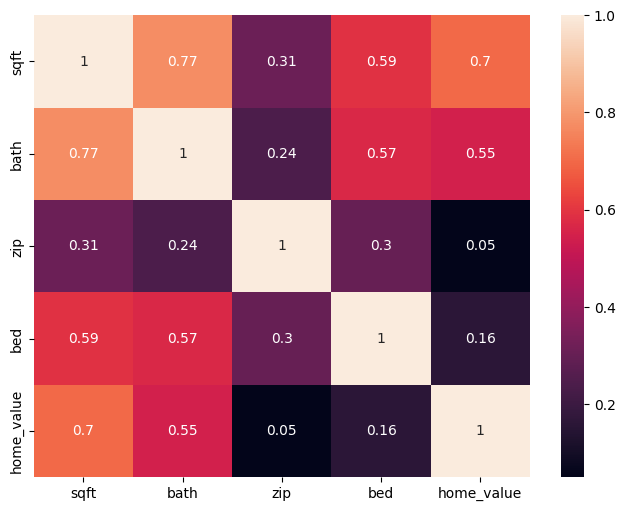

In [ ]:
# Here I'm checking the correlation between the features and the price of the home.
# It seems that bathrooms and sqft have a higher correlation amongst the price.

df5[["bath", "bed",'zip']] = df5[["bath", "bed",'zip']].apply(pd.to_numeric)
fig, ax = plt.subplots(figsize=(8, 6))
map = sns.heatmap(df5.corr(), annot=True)

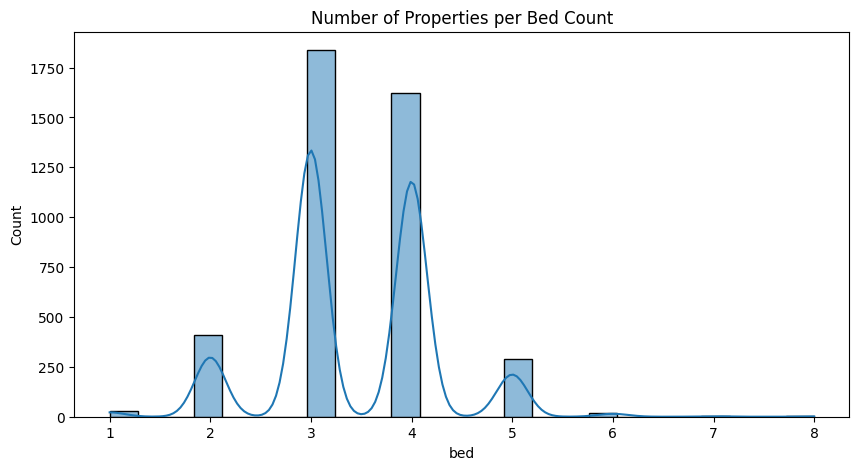

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df5,
             x="bed",
             stat="count",
             kde=True,
             bins=25
            )

plt.title("Number of Properties per Bed Count")
plt.show()

<Axes: xlabel='sqft', ylabel='home_value'>

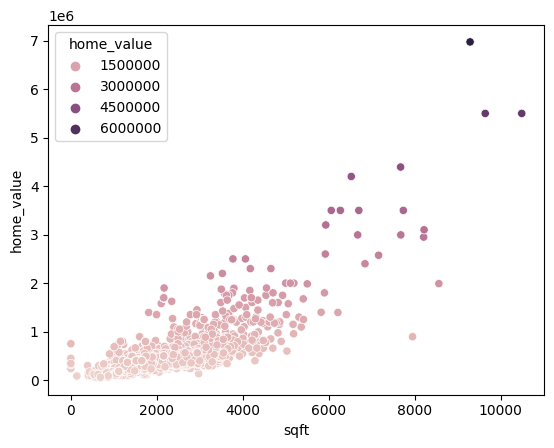

In [ ]:
sns.scatterplot(df5, x='sqft', y='home_value', hue='home_value')

In [ ]:
# Now, I will create dummy values for my zipcode, neighborhood, and property type columns

dummies_property_type = pd.get_dummies(df5.property_type)
dummies_zip = pd.get_dummies(df5.zip)
dummies_neighborhood = pd.get_dummies(df5.neighborhood)
df6 = pd.concat([df5, dummies_property_type, dummies_neighborhood, dummies_zip], axis = 'columns')
df6.head()

,neighborhood,sqft,bath,zip,bed,property_type,home_value,Condo/Townhome,Single Family,200 Patterso,...,78256,78257,78258,78259,78260,78261,78263,78264,78266,78555
0,Bulverde Village,3006.0,3.5,78261,5,Single Family,389000,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,Valley Ranch,2680.0,3.5,78254,5,Single Family,359900,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Dignowity,1530.0,1.0,78202,3,Single Family,259000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Hunters Creek North,2937.0,3.0,78230,4,Single Family,745000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Lakeview Ranch,2029.0,2.0,78263,4,Single Family,525000,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Now I will prepare my data for train test split, I will seperate my x and y values

X = df6.drop(['neighborhood', 'home_value', 'property_type', 'zip'], axis = 'columns')
y = df6.home_value
X.columns = X.columns.astype(str)

**Determining the best model**

In [ ]:
# Since I have a regression problem (continous values), I will pick regression based models.
# The models of choice are Decision Tree Regressor, Linear Regression, and Random Forest Regressor

model_params = {
    'Decision Tree Regressor' : {
        'model' : DecisionTreeRegressor(),
        'params' :{
            'max_depth' : [20, 40],
            'criterion' : ['friedman_mse','absolute_error'],
            'splitter' : ['best','random']
        }
    },
    'Random Forest Regressor' : {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : [10,50],
            'max_depth' : [25,50]
        }
    },
    'Linear Regression' : {
        'model' : LinearRegression(),
        'params' : {
            'positive' : [True, False],
            'fit_intercept' : [True, False],
            'copy_X' : [True, False]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
  clf = RandomizedSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
  clf.fit(X, y)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })

best_model = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params']) # gives best score/params for each model
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



,model,best_score,best_params
0,Decision Tree Regressor,0.665119,"{'splitter': 'best', 'max_depth': 20, 'criteri..."
1,Random Forest Regressor,0.733935,"{'n_estimators': 50, 'max_depth': 25}"
2,Linear Regression,0.623294,"{'positive': True, 'fit_intercept': False, 'co..."


**L1 and L2 Regularization**

In [ ]:
from sklearn.linear_model import Ridge
np.average(cross_val_score(Ridge(), X, y))

0.6656090996493503

In [ ]:
from sklearn.linear_model import Lasso
np.average(cross_val_score(Lasso(), X, y))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+13, tolerance: 4.513e+10

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+13, tolerance: 4.618e+10

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.000e+13, tolerance: 4.549e+10

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

0.6209857318722861

**Create a Function to predict Home Price**

In [ ]:
# Fitting the model using random forest regressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rf = RandomForestRegressor(n_estimators=50, max_depth=25, criterion='squared_error')
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8420713374579825

In [ ]:
# Creating a function to predict price

def predict_price_rf(neighborhood,bed,bath,sqft,property_type,zip):
  loc_index = np.where(X.columns==neighborhood)[0][0]          # Will locate where each neighborhood is indexed
  loc_index2 = np.where(X.columns==property_type)[0][0]
  loc_index3 = np.where(X.columns==zip)[0][0]

  x = np.zeros(len(X.columns))

  x[0] = bed
  x[1] = bath
  x[2] = sqft

  if loc_index >= 0:     # Returns a 1 if the neighborhood is found within the index
    x[loc_index] = 1
  if loc_index2 >= 0:
    x[loc_index2] = 1
  if loc_index3 >= 0:
    x[loc_index3] = 1

  return rf.predict([x])[0]

**Predict Random Home Values**

In [ ]:
predict_price_rf('Denver Heights', 3, 2, 1289, 'Single Family', '78210')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



318254.4481481482

In [ ]:
predict_price_rf('Palm Heights', 2, 1, 759, 'Single Family', '78225')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



271898.6666666667

In [ ]:
predict_price_rf('Redbird Ranch', 3, 2, 1574, 'Single Family', '78253')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



303275.19355355354

In [ ]:
predict_price_rf('Quintana Road', 3, 2, 718, 'Single Family', '78211')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



305252.28814814816

In [ ]:
import pickle
with open('san_antonio_home_prices_model.pickle', 'wb') as f:
  pickle.dump(rf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

**Sources**

In [ ]:
# https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

# https://stackoverflow.com/questions/69262280/how-to-use-zipcodes-to-create-map-plot-in-python

# https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/

# https://michael-fuchs-python.netlify.app/2019/04/28/how-to-suppress-scientific-notation-in-pandas/

# https://plotly.com/python/map-configuration/

# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

# https://stackoverflow.com/questions/13446480/python-pandas-remove-entries-based-on-the-number-of-occurrences
